# Modeling

The Titanic was a British passenger liner that sank in the North Atlantic Ocean on April 15, 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. Of the 2,224 passengers and crew on board, only 712 survived. The disaster was one of the deadliest peacetime maritime disasters in history, and it led to significant improvements in maritime safety regulations, including the requirement for ships to carry enough lifeboats for all passengers and crew.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('/Users/stratospheric/Documents/Titanic Competition/train_tit_ok.csv')
train.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Cat
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,adult
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,adult
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,adult
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adult
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adult


## Define and Normalize

I define Independent variables into X and transform `Sex` into numerical values with `replace.` because there is only two type of value.

In [3]:
X = train[['Pclass','Sex','Age','SibSp','Parch']]

mapping = {'male': 1, 'female': 2,}

X['Sex'] = X['Sex'].replace(mapping)

/var/folders/0t/4qvrg0m11ms665zgv8_lbr800000gp/T/ipykernel_82768/1259904578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].replace(mapping)


In [4]:
X.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,1,22.0,1,0
1,1,2,38.0,1,0
2,3,2,26.0,0,0
3,1,2,35.0,1,0
4,3,1,35.0,0,0


Now let's normalize those data since `Age` is not on the same scale as others features.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X[0:5]

array([[ 0.82737724, -0.73769513, -0.59705478,  0.43279337, -0.47367361],
       [-1.56610693,  1.35557354,  0.63416229,  0.43279337, -0.47367361],
       [ 0.82737724,  1.35557354, -0.28925051, -0.4745452 , -0.47367361],
       [-1.56610693,  1.35557354,  0.40330909,  0.43279337, -0.47367361],
       [ 0.82737724, -0.73769513,  0.40330909, -0.4745452 , -0.47367361]])

I define dependent variable into Y

In [6]:
Y = np.asarray(train['Survived'].astype('float64'))
Y[0:5]

array([0., 1., 1., 1., 0.])

## Data Splitting
We split our dataset into train and test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (712, 5) (712,)
Test set: (179, 5) (179,)


## Modeling

In [57]:
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report

We will explore some classification method to find the best fit.

I create a function to plot a confusion matrix to visualize the predictions.

In [63]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    plt.show() 

### Logistic Regression

In [43]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [44]:
lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)

In [45]:
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [46]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7891823161189359


In [47]:
log_acc = logreg_cv.score(X_test, y_test)
print("Accuracy on test data:", log_acc)

Accuracy on test data: 0.8212290502793296


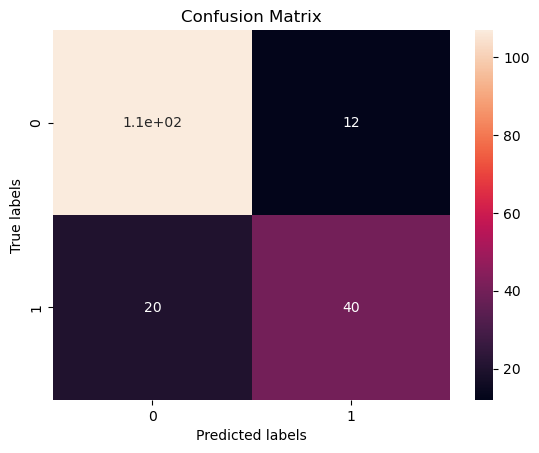

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       119
         1.0       0.77      0.67      0.71        60

    accuracy                           0.82       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.82      0.82      0.82       179



In [58]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)
print (classification_report(y_test, yhat))

## SVM

In [10]:
parameters = {'kernel': ('linear', 'rbf'),
              'C': [0.1, 1, 10],
              'gamma': ['scale', 'auto']}

In [11]:
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=10)

In [12]:
svm_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ('linear', 'rbf')})

In [14]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
accuracy : 0.8088419405320814


In [17]:
svm_acc = svm_cv.score(X_test, y_test)
print("Accuracy on test data:", svm_acc)

Accuracy on test data: 0.8603351955307262


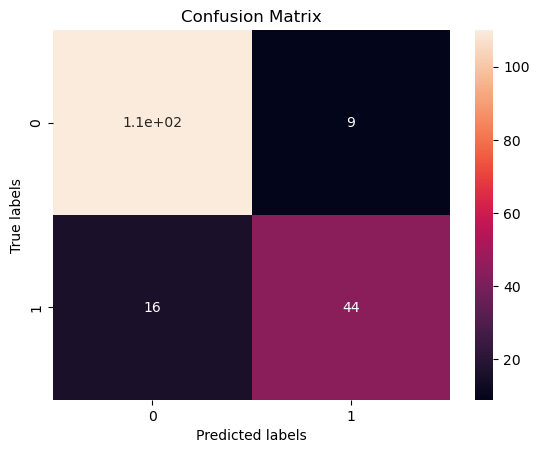

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.90       119
         1.0       0.83      0.73      0.78        60

    accuracy                           0.86       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.86      0.86      0.86       179



In [60]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)
print (classification_report(y_test, yhat))

## Decision Tree

In [28]:
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2, 4, 8, 16, 32, 64],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}



In [29]:
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree,parameters, cv=10)

In [ ]:
tree_cv.fit(X_train,y_train)

In [31]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
accuracy : 0.8088419405320814


In [32]:
tree_acc = tree_cv.score(X_test, y_test)
print("Accuracy on test data:", tree_acc)

Accuracy on test data: 0.8379888268156425


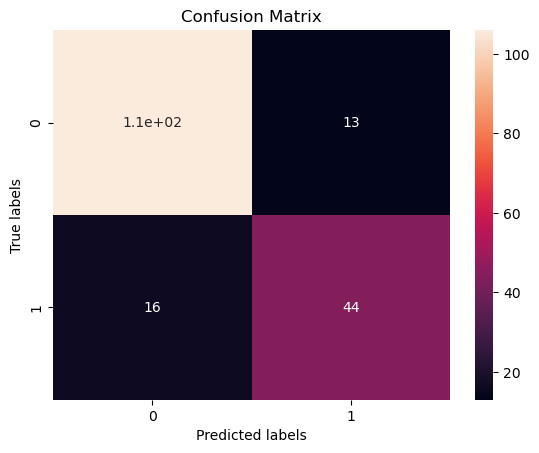

              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88       119
         1.0       0.77      0.73      0.75        60

    accuracy                           0.84       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.84      0.84      0.84       179



In [61]:
yhat=tree_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)
print (classification_report(y_test, yhat))

## KNN

In [34]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

In [35]:
KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters, cv=10)

In [36]:
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [37]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.815962441314554


In [39]:
knn_acc = knn_cv.score(X_test, y_test)
print("Accuracy on test data:", knn_acc)

Accuracy on test data: 0.8435754189944135


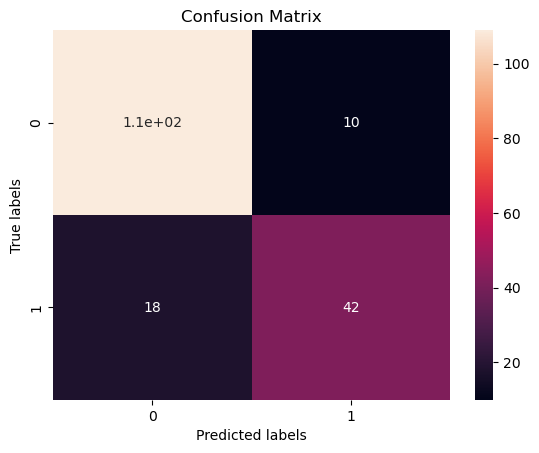

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       119
         1.0       0.81      0.70      0.75        60

    accuracy                           0.84       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.84      0.84      0.84       179



In [62]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)
print (classification_report(y_test, yhat))

## Final Evaluation

We have tried some methods, let's see and recap now which one perform the best for our dataset.

At each method I stored the accuracy score into a variable. I create a frame with those variables.

In [49]:
acc_mod = {'Method':['SVM','Tree','KNN','Log Reg'],
           'Accuracy_Test':[svm_acc,tree_acc,knn_acc,log_acc]}

acc_df = pd.DataFrame(acc_mod)
acc_df


,Method,Accuracy_Test
0,SVM,0.860335
1,Tree,0.837989
2,KNN,0.843575
3,Log Reg,0.821229


I love table, but let's plot a visual of our winner.

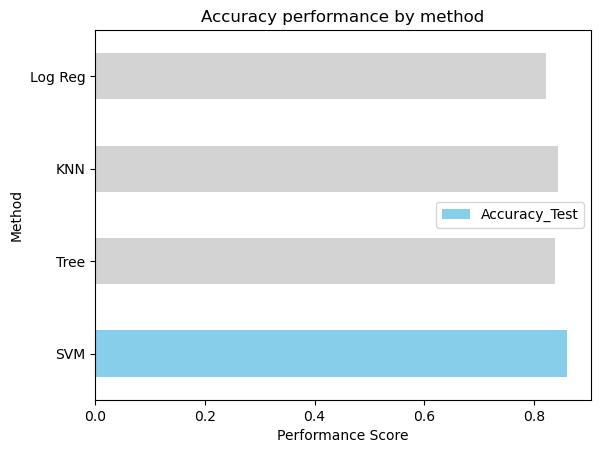

In [56]:

max_idx = acc_df['Accuracy_Test'].idxmax()

bar_color = ['lightgray'] * len(acc_df)
bar_color[max_idx] = 'skyblue'

acc_df.plot(kind='barh', x='Method', y='Accuracy_Test', color=bar_color)

plt.title('Accuracy performance by method')
plt.xlabel('Performance Score')
          

plt.show()


After evaluating multiple machine learning methods on the dataset, we found that the SVM achieved the highest accuracy score of 86%. Therefore, we recommend using SVM in order to predict Titanic survivor.

# Applying on Test Set

To submit the result, we now have to apply the SVM Method on the provided test set.

In [66]:
test = pd.read_csv('/Users/stratospheric/Documents/Titanic Competition/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [68]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [69]:
#replacing missing age value by average value
avg_value = test['Age'].mean().round()
avg_value
test['Age'].replace(np.nan, avg_value, inplace=True)


#Convert Sex into numerical value
mapping = {'male': 1, 'female': 2,}

test['Sex'] = test['Sex'].replace(mapping)

In [72]:
#Define X variable
X_test = test[['Pclass','Sex','Age','SibSp','Parch']]

In [73]:
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
X[0:5]

array([[ 0.82737724, -0.73769513, -0.59705478,  0.43279337, -0.47367361],
       [-1.56610693,  1.35557354,  0.63416229,  0.43279337, -0.47367361],
       [ 0.82737724,  1.35557354, -0.28925051, -0.4745452 , -0.47367361],
       [-1.56610693,  1.35557354,  0.40330909,  0.43279337, -0.47367361],
       [ 0.82737724, -0.73769513,  0.40330909, -0.4745452 , -0.47367361]])

### Final Prediction

I predict the survivor of the set, using the SVM method previously trained.

In [75]:
yhat_f = svm_cv.predict(X_test)
yhat_f[0:5]

array([0., 1., 0., 0., 1.])

In [76]:
test['Survived'] = yhat_f

In [77]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",2,47.0,1,0,363272,7.0000,NaN,S,1.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,22.0,1,1,3101298,12.2875,NaN,S,1.0


### Data Wrangling

For submission, I have to keep only `PassengerId` and `Survived` columns

In [85]:
submit_df = test[['PassengerId','Survived']]
submit_df.set_index('PassengerId', inplace=True)
submit_df.head()

,Survived
PassengerId,
892,0.0
893,1.0
894,0.0
895,0.0
896,1.0


In [88]:
submit_df['Survived'] = submit_df['Survived'].astype('int')
submit_df.head()

/var/folders/0t/4qvrg0m11ms665zgv8_lbr800000gp/T/ipykernel_82768/2829122088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit_df['Survived'] = submit_df['Survived'].astype('int')


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [89]:
submit_df.to_csv('titanic_submit_2023_03_31.csv')

Now it's time to submit and get result !

![alt text](titanic_leaderboard.png)
